# Magister en Ciencia de Datos - UDD
## DBAnalytics (Ciencia de Datos aplicada)
**Sprint 2: Datos transformados II**

En base a las funciones RFM del Sprint 1, crear nuevos features para cada variable en el dataset user_logs.csv y transactions.csv (sólo si aplica).
Crear nuevas funciones para construir features tales como:
Tendencias de actividad del msno entre diferentes rangos de tiempo usando diferentes variables, usando variables del dataset user_logs.csv
Métricas de la actividad del msno usando diferentes variables del dataset transactions.csv 
En base a las funciones implementadas (y otras definidas por cada grupo), se deben implementar al menos 300 features. 


### Creamos la Feature user_latent_satisfaction
* **user_latent_satisfaction**: para cada usuario calculamos el nº de canciones reproducidas sobre el 98.5% en los últimos 6 meses dividiva por la cantidad total de canciones reproducidas

* Hacemos un left join de la tabla **user_logs** y **user_label_201703**
* Se considera el periodo entre 2016-09-01 al 2017-02-28, es decir, entre Septiembre  2016 a Febrero 2017

In [4]:
%%bigquery query
WITH feature AS(
                SELECT msno, AVG(single_day_latent_satisfaction) AS user_latent_satisfaction
                FROM( 
                     SELECT msno, ( num_100 / (num_25 + num_50 + num_75 + num_985 + num_100) ) AS single_day_latent_satisfaction
                     FROM `kk-churn.DATASET.user_logs`
                     WHERE date > 20160901 AND date < 20170228 )
                GROUP BY msno)
SELECT train.msno, feature.user_latent_satisfaction
FROM `kk-churn.DATASET.user_label_201703` AS train
LEFT JOIN feature
ON  train.msno = feature.msno

In [5]:
query.head()

,msno,user_latent_satisfaction
0,+2oK/qWmYvAnfNZsVV5pdsJ9n6d/LZn6CdwiJajGZas=,0.555549
1,+iMj+cgRiFJrmnOOLGwEZu6nzH0KbsMIdOZkpItAXTs=,0.798740
2,10QzA1bL7qK5Oeec6OlbyUEBOipzjY4OHN8gf2xokW4=,0.512925
3,2Dvm0YBqp+gDTOksgoR5ixNOk64C6ozpBzEkhbdkTrE=,0.958960
4,7B2xf5mD+GijSROhxSmKDuybhy+H5rgjfSy9sy6Xt4g=,0.762336


In [6]:
query.to_csv("gs://kk_data_udd/user_latent_satisfaction.csv", index=False)

In [9]:
df_user_latent_satisfaction = pd.read_csv("gs://kk_data_udd/user_latent_satisfaction.csv")

In [10]:
df_user_latent_satisfaction.head()

,msno,user_latent_satisfaction
0,+2oK/qWmYvAnfNZsVV5pdsJ9n6d/LZn6CdwiJajGZas=,0.555549
1,+iMj+cgRiFJrmnOOLGwEZu6nzH0KbsMIdOZkpItAXTs=,0.798740
2,10QzA1bL7qK5Oeec6OlbyUEBOipzjY4OHN8gf2xokW4=,0.512925
3,2Dvm0YBqp+gDTOksgoR5ixNOk64C6ozpBzEkhbdkTrE=,0.958960
4,7B2xf5mD+GijSROhxSmKDuybhy+H5rgjfSy9sy6Xt4g=,0.762336


## Creamos la Feature day_listen

* **day_listen**: para cada usuario calculamos el número de días escuchando canciones en los últimos 6 meses.
* Se considera el periodo entre 2016-09-01 al 2017-02-28, es decir, entre Septiembre 2016 a Febrero 2017

In [11]:
%%bigquery query
WITH features AS (
                   SELECT  msno AS msno , COUNT(msno) AS day_listen
                   FROM `kk-churn.DATASET.user_logs`
                   WHERE date > 20160901 AND date < 20170228 
                   GROUP BY msno)
SELECT train.msno, train.is_churn, features.day_listen
FROM `kk-churn.DATASET.user_label_201703` AS train
LEFT JOIN features 
ON   train.msno = features.msno 

Hacemos un left join de la tabla **user_logs** y **user_label_201703**

In [12]:
query.to_csv('gs://kk_data_udd/day_listen.csv', index=False)

In [2]:
df_day_listen = pd.read_csv('gs://kk_data_udd/day_listen.csv')

In [3]:
df_day_listen.head()

,msno,is_churn,day_listen
0,+MFM2WIg07EADKRI0gm/Vq+3s2jDW838pVt477htI8k=,False,74.0
1,/fBID42G+PGSb8jQ4Lo0p6DI6gX78OIp5/thoFYn68M=,False,27.0
2,/qu3BCDcv1UqIHl2kal9kqrWlpYy4QMW5LolR5fR5/A=,False,126.0
3,/reu7jVe3U4hlk366ZmiR/YkVi6H/C2SSa8J4tSQtsQ=,False,66.0
4,1VIbdCaMTd1AKazZRzQDDrtO+emWOrncVaGRxEG8eiY=,False,130.0


## Creamos el Dataset de Training
* Septiembre 2016 a Febrero 2017

In [15]:
df_train = pd.merge(df_day_listen, df_user_latent_satisfaction, how='left',on=['msno'])
df_train.head()

,msno,is_churn,day_listen,user_latent_satisfaction
0,+MFM2WIg07EADKRI0gm/Vq+3s2jDW838pVt477htI8k=,False,74.0,0.606499
1,/fBID42G+PGSb8jQ4Lo0p6DI6gX78OIp5/thoFYn68M=,False,27.0,0.569537
2,/qu3BCDcv1UqIHl2kal9kqrWlpYy4QMW5LolR5fR5/A=,False,126.0,0.522733
3,/reu7jVe3U4hlk366ZmiR/YkVi6H/C2SSa8J4tSQtsQ=,False,66.0,0.838408
4,1VIbdCaMTd1AKazZRzQDDrtO+emWOrncVaGRxEG8eiY=,False,130.0,0.559075


### Empezamos el Dataset de testing

* Hacemos un left join de la tabla **user_logs** y **user_label_201703**
* Se considera el periodo entre 2016-10-01 al 2017-03-31, es decir, entre Octubre 2016 a Marzo 2017

In [16]:
%%bigquery query
WITH feature AS(
                SELECT msno, AVG(single_day_latent_satisfaction) AS user_latent_satisfaction
                FROM( 
                     SELECT msno, ( num_100 / (num_25 + num_50 + num_75 + num_985 + num_100) ) AS single_day_latent_satisfaction
                     FROM `kk-churn.DATASET.user_logs`
                     WHERE date > 20161001 AND date < 20170331 )
                GROUP BY msno)
SELECT sub.msno, feature.user_latent_satisfaction
#FROM `kk-churn.DATASET.sample_submission_zero` AS sub
FROM `kk-churn.DATASET.user_label_201703` AS sub
LEFT JOIN feature
ON  sub.msno = feature.msno

Creamos el archivo **sub_user_satisfaction.csv**

In [17]:
query.to_csv('gs://kk_data_udd/sub_user_satisfaction.cvs', index=False)

* Hacemos un left join de la tabla user_logs y user_label_201703
* Se considera el periodo entre 2016-10-01 al 2017-03-31, es decir, entre Octubre 2016 a Marzo 2017

In [18]:
%%bigquery query
WITH features AS (
                   SELECT  msno AS msno , COUNT(msno) AS day_listen
                   FROM `kk-churn.DATASET.user_logs`
                   -- WHERE date > 20161001 AND date < 20170228
                   WHERE date > 20161001 AND date < 20170331 
                   GROUP BY msno)
SELECT sub.msno, sub.is_churn, features.day_listen
FROM `kk-churn.DATASET.sample_submission_zero` AS sub
LEFT JOIN features 
ON   sub.msno = features.msno

Creamos el archvivo **sub_day_listen.csv**

In [19]:
query.to_csv('gs://kk_data_udd/sub_day_listen.csv', index=False)

Creamos el Dataframe **df_sub_day_listen**

In [20]:
df_sub_day_listen = pd.read_csv('gs://kk_data_udd/sub_day_listen.csv')

Creamos el Dataframe **df_sub_user_satisfaction**

In [21]:
df_sub_user_satisfaction = pd.read_csv('gs://kk_data_udd/sub_user_satisfaction.cvs')

## Creamos el Dataset de Testeo

In [22]:
df_sub = pd.merge(df_sub_day_listen, df_sub_user_satisfaction, how='left',on=['msno'])
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 4 columns):
msno                        970960 non-null object
is_churn                    970960 non-null int64
day_listen                  813832 non-null float64
user_latent_satisfaction    714814 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 37.0+ MB


In [23]:
df_sub.head()

,msno,is_churn,day_listen,user_latent_satisfaction
0,9G2HIfWWtBKEnlMc51m/1eEibcZi8fq/Rh2/GV5BNBk=,0,40.0,0.406972
1,aDkz106PW4CepBxFOaLidgtq/e4qPhbWmYsqRJM+1m8=,0,132.0,NaN
2,6eS4mKB/s+9gabJd7BMABWOawypnrHpcrnwDA0v5we4=,0,80.0,0.803623
3,JS/wZ7lAwXfIoaISc1cpoPdk0UTpmE5ir/7423y6iXA=,0,61.0,0.599232
4,NsPYzo6+LUzW53fRVtllsPZ5+NDSFhCt17Mn3iTebeM=,0,141.0,0.718252


### Análisis Exploratorio

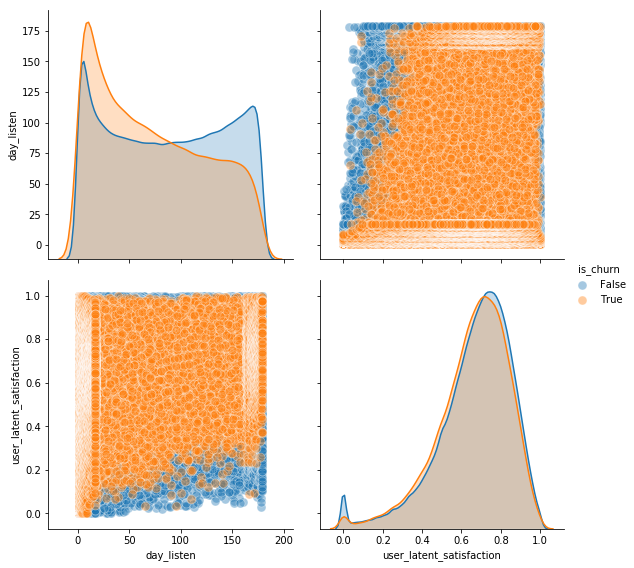

In [24]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.pairplot(df_train.dropna(),vars=['day_listen','user_latent_satisfaction'],\
             diag_kind='kde',hue='is_churn',plot_kws = {'alpha': 0.4, 's': 80},size = 4)

### Heat Map 

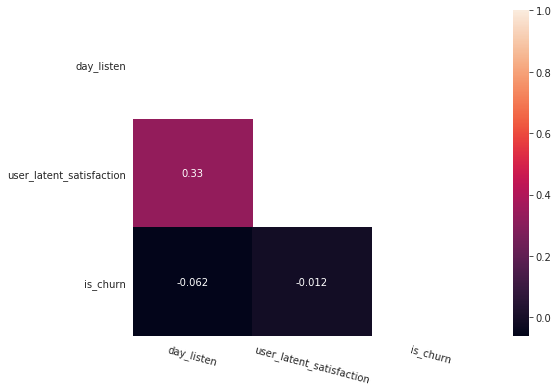

In [25]:
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = df_train[['day_listen','user_latent_satisfaction','is_churn']].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(8,6))
  corr_map = sns.heatmap(corr_matrix,mask=mask,annot=True,ax=ax)
  plt.xticks(rotation=-15)

### Missing Values

In [26]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print('training set:')
print(''*60)
print(df_train.isnull().sum() / len(df_train))

print('_'*60)

print('testing set:')
print(''*60)
print(df_sub.isnull().sum() / len(df_sub))

training set:

msno                       0.000
is_churn                   0.000
day_listen                 0.173
user_latent_satisfaction   0.173
dtype: float64
____________________________________________________________
testing set:

msno                       0.000
is_churn                   0.000
day_listen                 0.162
user_latent_satisfaction   0.264
dtype: float64


### Analizamos la feature Day_listen

In [27]:
df_train.head()

,msno,is_churn,day_listen,user_latent_satisfaction
0,+MFM2WIg07EADKRI0gm/Vq+3s2jDW838pVt477htI8k=,False,74.000,0.606
1,/fBID42G+PGSb8jQ4Lo0p6DI6gX78OIp5/thoFYn68M=,False,27.000,0.570
2,/qu3BCDcv1UqIHl2kal9kqrWlpYy4QMW5LolR5fR5/A=,False,126.000,0.523
3,/reu7jVe3U4hlk366ZmiR/YkVi6H/C2SSa8J4tSQtsQ=,False,66.000,0.838
4,1VIbdCaMTd1AKazZRzQDDrtO+emWOrncVaGRxEG8eiY=,False,130.000,0.559


In [28]:
import numpy as np
# Rellenamos con na con -1
df_train[['day_listen','user_latent_satisfaction']] = df_train[['day_listen','user_latent_satisfaction']].fillna(-1)
df_sub[['day_listen','user_latent_satisfaction']] = df_sub[['day_listen','user_latent_satisfaction']].fillna(-1)
# Imputamos nan en el testing set
df_sub['is_churn'] = np.nan
# combine 
df_data = df_train.append(df_sub)

In [29]:
df_data.head()

,msno,is_churn,day_listen,user_latent_satisfaction
0,+MFM2WIg07EADKRI0gm/Vq+3s2jDW838pVt477htI8k=,0.000,74.000,0.606
1,/fBID42G+PGSb8jQ4Lo0p6DI6gX78OIp5/thoFYn68M=,0.000,27.000,0.570
2,/qu3BCDcv1UqIHl2kal9kqrWlpYy4QMW5LolR5fR5/A=,0.000,126.000,0.523
3,/reu7jVe3U4hlk366ZmiR/YkVi6H/C2SSa8J4tSQtsQ=,0.000,66.000,0.838
4,1VIbdCaMTd1AKazZRzQDDrtO+emWOrncVaGRxEG8eiY=,0.000,130.000,0.559


In [30]:
# Creamos 4 cortes/bins
bins = 4

df_data.loc[(df_data.day_listen >= 0),'day_listen_level'] = pd.cut(df_data.loc[(df_data.day_listen >= 0),'day_listen'], bins,labels=[1,2,3,4])
df_data.day_listen_level = df_data.day_listen_level.fillna(-1)

In [31]:
df_data.head()

,msno,is_churn,day_listen,user_latent_satisfaction,day_listen_level
0,+MFM2WIg07EADKRI0gm/Vq+3s2jDW838pVt477htI8k=,0.000,74.000,0.606,2
1,/fBID42G+PGSb8jQ4Lo0p6DI6gX78OIp5/thoFYn68M=,0.000,27.000,0.570,1
2,/qu3BCDcv1UqIHl2kal9kqrWlpYy4QMW5LolR5fR5/A=,0.000,126.000,0.523,3
3,/reu7jVe3U4hlk366ZmiR/YkVi6H/C2SSa8J4tSQtsQ=,0.000,66.000,0.838,2
4,1VIbdCaMTd1AKazZRzQDDrtO+emWOrncVaGRxEG8eiY=,0.000,130.000,0.559,3


In [32]:
# Ceeamos el Dataframe df_percent, creamos (% para cada valor)
from pandas.plotting import table
df_percent = pd.DataFrame( df_data.day_listen_level.value_counts().sort_index() / len(df_data) ).round(3) 

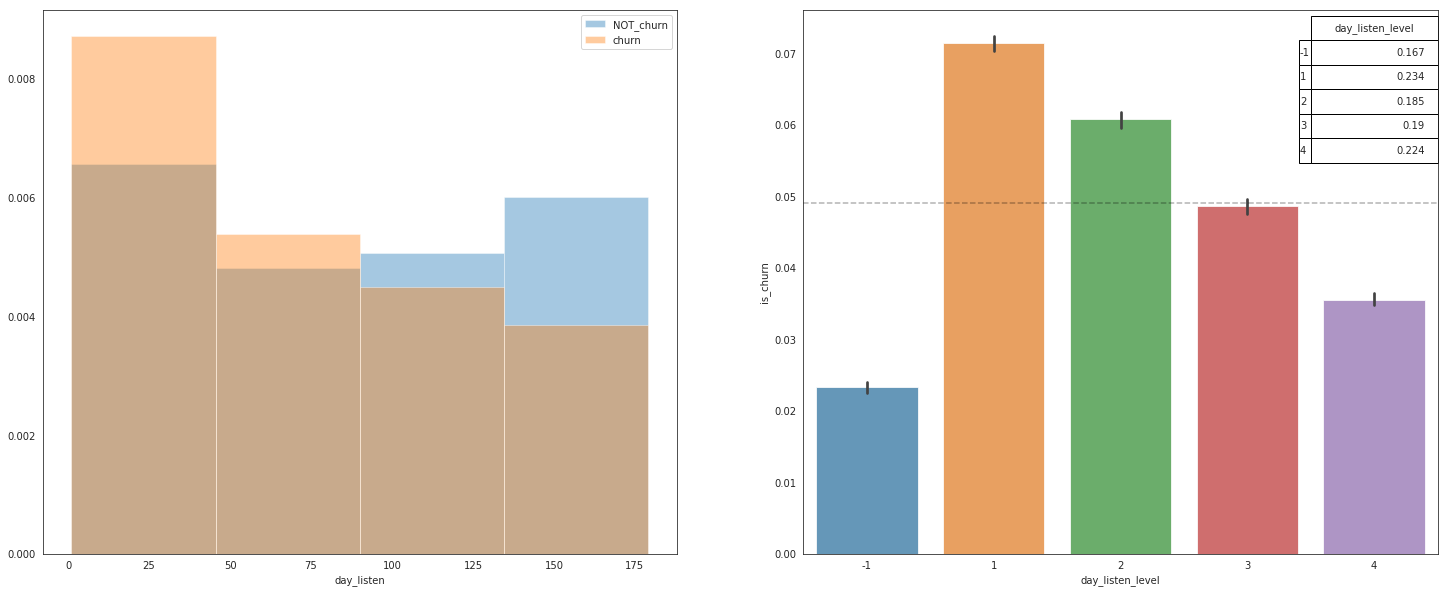

In [33]:
# Distribución
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

with sns.axes_style('white'):
  fig, [ax1,ax2] = plt.subplots(1,2, figsize=(25,10))
  sns.distplot(df_data.loc[(df_data.is_churn == 0) & (df_data.day_listen >= 0), 'day_listen'],kde=False, bins=bins, label='NOT_churn',ax=ax1,norm_hist=True)
  sns.distplot(df_data.loc[(df_data.is_churn == 1)& (df_data.day_listen >= 0), 'day_listen'],kde=False, bins=bins, label='churn',ax=ax1,norm_hist=True)
  ax1.legend()

  # barplot con churn_rate y df_percent table
  sns.barplot(x='day_listen_level', y='is_churn', data=df_data,ax=ax2,alpha=.75)
  ax2.axhline(0.049,linestyle='dashed',c='black',alpha=.3)
  table(ax2, df_percent,bbox=[0.80, 0.72, 0.2, 0.27])